# Assignment 2. Semi-open, Classification

## Frame the Problem


### Problem
Predict which passengers on the titanic survived based on their age, gender number of siblings, etc.

The goal is to predict which passengers survived the Titanic shipwreck.

### Importing the basic libraries

In [1153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

## Importing the Data

In [1154]:
data = pd.read_csv('Titanic_Data.csv')

In [1155]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,No
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Yes
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Yes
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Yes
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,No


## Cleaning the Data

### Dropping Irrelevant Input Data
We will remove the passenger name and passenger ID from the dataset because this does not affect the outcome of who survived.

In [1156]:
data.drop(['PassengerId', 'Name'], axis=1, inplace=True)


In [1157]:
data.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,No
1,1,female,38.0,1,0,71.2833,C,Yes
2,3,female,26.0,0,0,7.9250,S,Yes
3,1,female,35.0,1,0,53.1000,S,Yes
4,3,male,35.0,0,0,8.0500,S,No


### Converting the Categorical data to Numerical Data

In the dataset,  there are 3 columns with the catergorical values that need to be converted to numerical values. These are:

* Sex
* Embarked
* Survived

We will also check that the dataset is complete and there is no null cells.

In [1158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    object 
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    object 
 7   Survived                           891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Converting the values of the "purchased" column

In [1159]:
# getting the unique values in the purchase column
data['Survived'].unique()

array(['No', 'Yes'], dtype=object)

In [1160]:
# make the dictionary of the items in the "survived" column
survived = {"No": 0, "Yes": 1}
data["Survived"] = data["Survived"].map(survived)
data["Survived"].head()  # checking if the changes are applied

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Converting the values of the "sex" column

In [1161]:
# getting the unique values in the sex column
data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [1162]:
# make the dictionary of the items in the "sex" column
gender = {"male":0.0, "female":1.0}
data['Sex'] = data['Sex'].map(gender)
data['Sex'].head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Sex, dtype: float64

Converting the values of the "embarked" column

In [1163]:
# getting the unique values in the embarked column
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1164]:
# make the dictionary of the items in the "embarked" column
ports = {'S':0.0, 'C':1.0, 'Q':2.0}
data['Embarked'] = data['Embarked'].map(ports)
data['Embarked'].head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Embarked, dtype: float64

Check the dataset to see if changes are applied.

In [1165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    float64
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    float64
 7   Survived                           891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Encoding the Output Data (Labels)

In [1166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Survived'] = le.fit_transform(data['Survived'])
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Checking the Preprocessed Dataset

In [1167]:
X = data.iloc[:, 0:7]
y = data.iloc[:, -1]

### Showing the Input Data in a Table Format

In [1168]:
X.head()

,Pclass,Sex,Age,Number of Siblings/Spouses Aboard,Number of Parents/Children Aboard,Fare,Embarked
0,3,0.0,22.0,1,0,7.2500,0.0
1,1,1.0,38.0,1,0,71.2833,1.0
2,3,1.0,26.0,0,0,7.9250,0.0
3,1,1.0,35.0,1,0,53.1000,0.0
4,3,0.0,35.0,0,0,8.0500,0.0


### A Quick Check of the Output Data

In [1169]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Taking Care of Missing Data Inputs

In [1170]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

In [1171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Pclass                             891 non-null    int64  
 1   Sex                                891 non-null    float64
 2   Age                                714 non-null    float64
 3   Number of Siblings/Spouses Aboard  891 non-null    int64  
 4   Number of Parents/Children Aboard  891 non-null    int64  
 5   Fare                               891 non-null    float64
 6   Embarked                           889 non-null    float64
 7   Survived                           891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


### Cleaning the Data from the Outliers

Box plots before cleaning the data

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

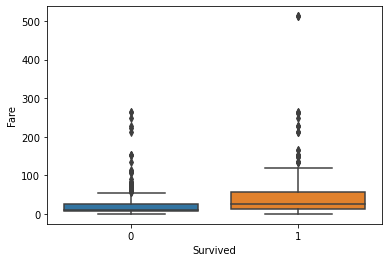

In [1172]:
sb.boxplot(x='Survived', y='Fare', data=data)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

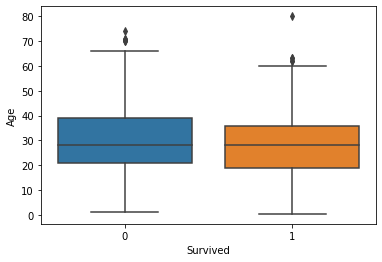

In [1173]:
sb.boxplot(x='Survived', y='Age', data=data)

Now, let's clean the data

In [1174]:
# data = data[((data['Age'] < 60.0) & (data['Survived']==0)) | (data['Survived']==1)]
index = data[data['Fare'] > 35].index
data.drop(index,inplace=True)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

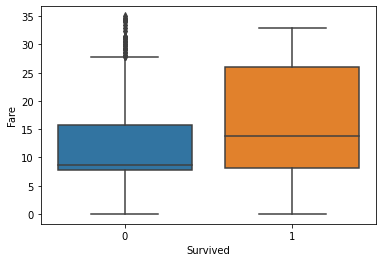

In [1175]:
sb.boxplot(x='Survived', y='Fare', data=data)

In [1176]:
# data = data[ ((data['Fare']<80.0) & (data['Survived']==0)) | (data['Survived']==1)]
index = data[(data['Age'] > 50)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

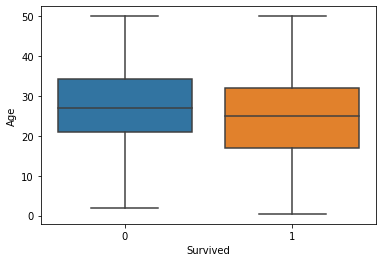

In [1177]:
sb.boxplot(x='Survived', y='Age', data=data)

## Exploring the Data

Here, we will check the correlation between "Survived" column and the other colunms

You can find more info about the heatmap function in Seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Survived                             1.000000
Sex                                  0.495872
Fare                                 0.211701
Number of Parents/Children Aboard    0.109968
Embarked                             0.096231
Number of Siblings/Spouses Aboard    0.010446
Age                                 -0.146224
Pclass                              -0.225451
Name: Survived, dtype: float64

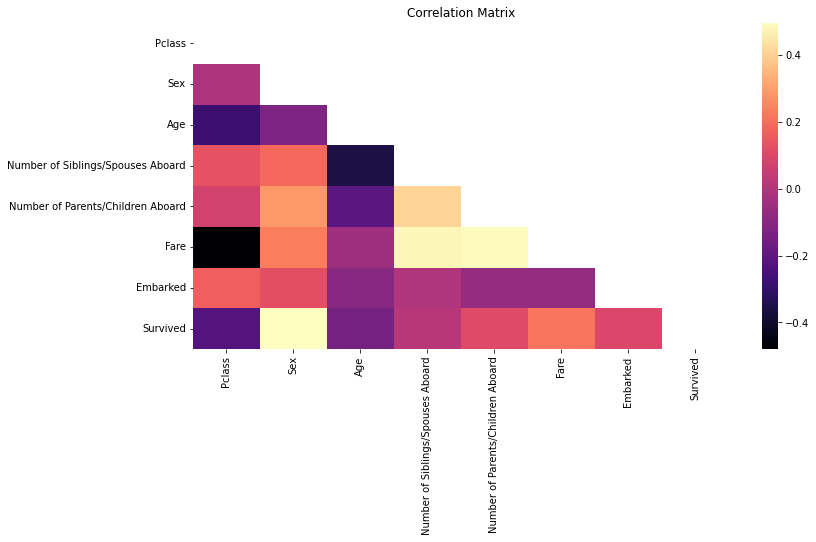

In [1178]:
# creating the correlation matrix
##  start the code here
corr_matrix = data.corr()
## End

# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column
## Start the code here
corr_matrix['Survived'].sort_values(ascending=False)
## End

### Splitting the train and test data

In [1179]:
## Code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)## End

# # splitting the input and the output from the training set
# Y_train = train_data[['Survived']].copy()

# # removing the output from the dataset
# X_train = train_data.drop(['Survived'], axis=1)  # drop "Survived"

In [1180]:
X_train.shape

(712, 7)

In [1189]:
X_test.shape

(179, 7)

Let's check the type of the data 

In [1182]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [1195]:
X_train

array([[ 0.83659324, -0.73334642, -0.02810499, ..., -0.478173  ,
        -0.18801432,  2.54445375],
       [-1.55559305,  1.36361202, -0.00541218, ..., -0.478173  ,
         0.53969044,  0.98574333],
       [-0.35949991,  1.36361202,  0.29627125, ..., -0.478173  ,
        -0.46350293, -0.57296708],
       ...,
       [-0.35949991, -0.73334642, -0.6841999 , ..., -0.478173  ,
         0.89773487, -0.57296708],
       [ 0.83659324,  1.36361202, -0.02810499, ..., -0.478173  ,
        -0.52724343, -0.57296708],
       [ 0.83659324, -0.73334642, -0.6841999 , ..., -0.478173  ,
        -0.51643995, -0.57296708]])

### Data visualization

In [1190]:
# making a function to plot the data
def plot_scatter_with_labels(X1, X2, Y, xlabel='Age', ylabel='Fare'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 0:
      name = 'Did not survived'
    elif number == 1:
      name = 'Survived'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


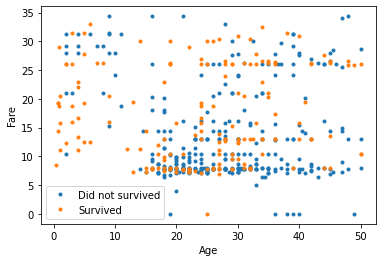

In [1202]:
plot_scatter_with_labels(data['Age'], data['Fare'], data['Survived'])

### Scaling the features

We standardize all the data using their mean and standard deviation

$$ \hat{x_i} = \frac{x_i-\mu}{\sigma_i}$$

In [1185]:
print(type(X_train))

<class 'numpy.ndarray'>


In [1198]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(type(X_train))

<class 'numpy.ndarray'>


## Exploring Different Machine Learning Models

In [1187]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Converting the output to numpy array and changing the shape

In [1188]:
Y_train = Y_train.to_numpy()
Y_train = Y_train.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

#### Discriminant Analysis Classifier

In [ ]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[nan nan nan nan nan]
Averaged prediction accuracy =  nan


c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 508, in fit
    X, y = self._validate_data(X, y, ensure_min_samples=2, estimator=self,
  File "c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\Users\jtsan\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, ac

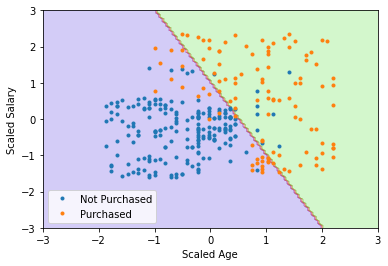

In [ ]:
def plot_decision_boundary(clf, axes, inverse_transform=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(100, 100)
    if inverse_transform:
        X = scaler.inverse_transform(np.c_[x0s, x1s])
        x0, x1 = np.meshgrid(X[:,0], X[:,1])
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

def plot_prediction_results(clf, X, Y):
    plot_decision_boundary(clf, [-3, 3, -3, 3])
    plot_scatter_with_labels(X[:,0], X[:,1], Y, xlabel='Scaled Age', ylabel='Scaled Salary')
    
plot_prediction_results(da_clf, X_train, Y_train)

#### Naive Bayes Classifier

[0.90625    0.93650794 0.93650794 0.88888889 0.93650794]
Averaged prediction accuracy =  0.9209325396825397


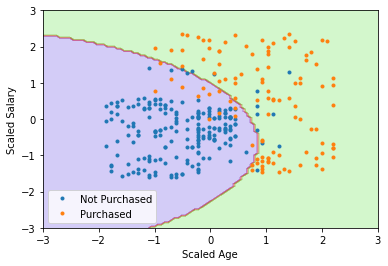

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)
plot_prediction_results(nb_clf, X_train, Y_train)

#### K-Nearst Neighbors

[0.921875   0.96825397 0.96825397 0.84126984 0.96825397]
Averaged prediction accuracy =  0.9335813492063492


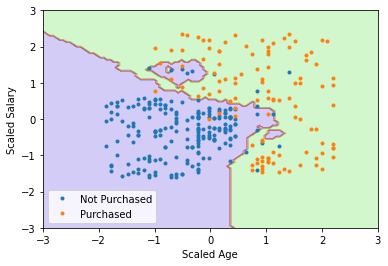

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)
plot_prediction_results(knn_clf, X_train, Y_train)

#### Linear SVM

[0.90625    0.87301587 0.84126984 0.79365079 0.9047619 ]
Averaged prediction accuracy =  0.8637896825396826


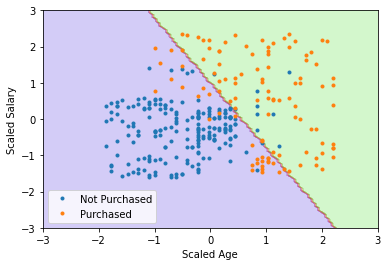

In [ ]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)
plot_prediction_results(svmln_clf, X_train, Y_train)

#### Nonlinear SVM (Gaussian Kernel)

[0.90625    0.96825397 0.93650794 0.88888889 0.93650794]
Averaged prediction accuracy =  0.9272817460317461


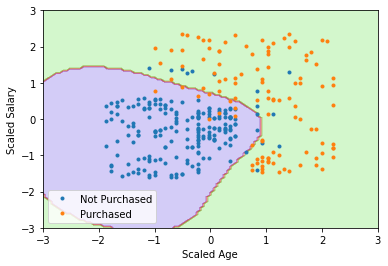

In [ ]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)
plot_prediction_results(svmrbf_clf, X_train, Y_train)

#### Decision Tree

[0.890625   0.93650794 0.95238095 0.88888889 0.95238095]
Averaged prediction accuracy =  0.924156746031746


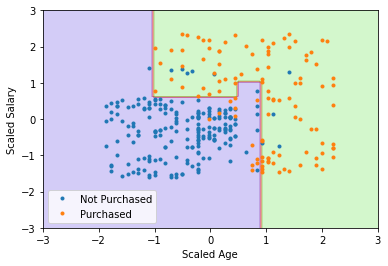

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)
plot_prediction_results(tree_clf, X_train, Y_train)

In [ ]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('KNN', 0.9335813492063492),
 ('SVM-nonlinear', 0.9272817460317461),
 ('Decision Tree', 0.924156746031746),
 ('NB', 0.9209325396825397),
 ('DA', 0.8701388888888889),
 ('SVM-linear', 0.8637896825396826)]

#### using the models to predict the testset

In [ ]:
X_test = scaler.transform(test_data[['Age', 'EstimatedSalary']])
# X_test = X_test.to_numpy()

In [ ]:
Y_test = test_data['Purchased']

Using the trained models to do prediction on the test set

In [ ]:
test_pred_score = {}

In [ ]:
# Discriminant Analysis Classifier
Y_test_pred_da = da_clf.predict(X_test)
test_pred_score['DA'] = accuracy_score(Y_test, Y_test_pred_da)

# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)

# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)

# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)

# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)

# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)

In [ ]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('KNN', 0.8987341772151899),
 ('SVM_nonlinear', 0.8987341772151899),
 ('NB', 0.8734177215189873),
 ('Decision Tree', 0.8481012658227848),
 ('DA', 0.7848101265822784),
 ('SVM_Linear', 0.7848101265822784)]